### Answers to Assignment 4 of 230Q

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q1

$$P=E_0(e^{-rT}\Phi(S_T))=e^{-rT}\int_{-\infty}^{\infty}1_{S_T \ge K}\frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}dz=e^{-rT}Pr(S_T \ge K)$$

$S_T=S_0e^{(r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}z}\ge K$ => $z \ge \frac{\log(\frac{K}{S_0})-(r-\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$ => $Pr(S_T \ge K)=1-N(\frac{\log(\frac{K}{S_0})-(r-\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}})=N(\frac{\log(\frac{S_0}{K})+(r-\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}})$

$\therefore P=e^{-rT}N(\frac{\log(\frac{S_0}{K})+(r-\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}})$

In [37]:
from scipy.stats import norm
price = norm.cdf((np.log(100/110)+(0.1-0.16**2/2))/0.16) *np.exp(-0.1)
print(price)

0.43412906827949826


### Q2

In [45]:
import math
def binomial_tree_pricing(N, r=0.1, sigma=0.16, T=1, s0=100, K=110):
    u=np.exp((r-1/2*sigma**2)*T/N+sigma*np.sqrt(T/N))
    R=np.exp(r*T/N)
    d = np.exp((r-1/2*sigma**2)*T/N-sigma*np.sqrt(T/N))
    q = (R-d)/(u-d)
    output = 0
    for i in range(N+1):
        st = (u**(N-i))*(d**i)*s0
        if st >= K:
            output += math.comb(N, i)*(q**(N-i))*((1-q)**i)*np.exp(-r*T)
    return output

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


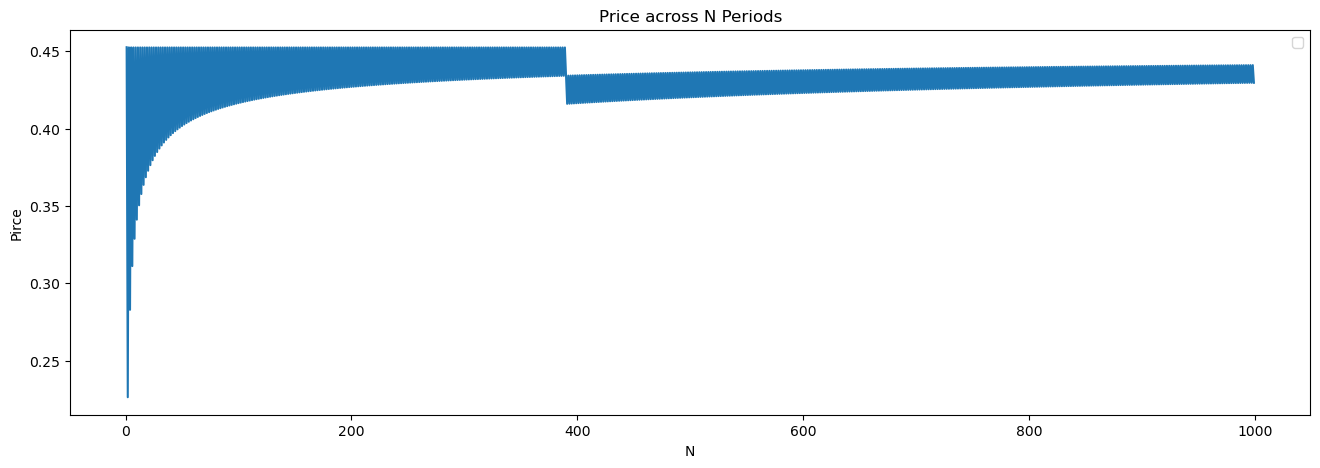

In [53]:
prices = []
for i in range(1,1000):
    prices.append(binomial_tree_pricing(N=i))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
axes.plot(list(range(1,1000)), prices)
axes.legend()
axes.set_title("Price across N Periods")
axes.set_xlabel("N")
axes.set_ylabel("Pirce")
plt.show()    

In [55]:
for i in range(len(prices)):
    if i == len(prices)-1:
        if abs(prices[i]-price) <= 0.01:
            print(i)
            break
    else:
        if abs(prices[i]-price) <= 0.01 and abs(prices[i+1]-price) <= 0.01:
            print("N=", i+1)
            print(prices[i])
            break

N= 650
0.43826562487775356


In our case, N=650 is our threshold for pricing error to start to fall below 0.01.